In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/it-student-dataset/IT Students Data.csv")
df.head()

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,165527,Bryan Rogers,1/19/2006,Computer Science,2020,2017,3,Web Development,155152,19572
1,635763,James Hogan,5/23/1999,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,740021,David Robinson,12/2/1997,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,433076,Susan Miller,10/30/1999,Computer Science,2021,2019,1,Data Science,134955,17284
4,441628,Brittany Martin,1/10/1998,Chemical Engineering,2016,2018,1,Network Security,125934,14871


In [3]:
features = ["Fees"]
X_train = df[features]
X_train.head()

,Fees
0,155152
1,157870
2,55662
3,134955
4,125934


In [4]:
target = "Discount on Fees"
y_train = df[target]
y_train.head()

0    19572
1    14760
2     5871
3    17284
4    14871
Name: Discount on Fees, dtype: int64

In [5]:
y_mean = y_train.mean()
y_mean

12484.258575

In [6]:
y_pred_baseline = [y_mean] * len(y_train)

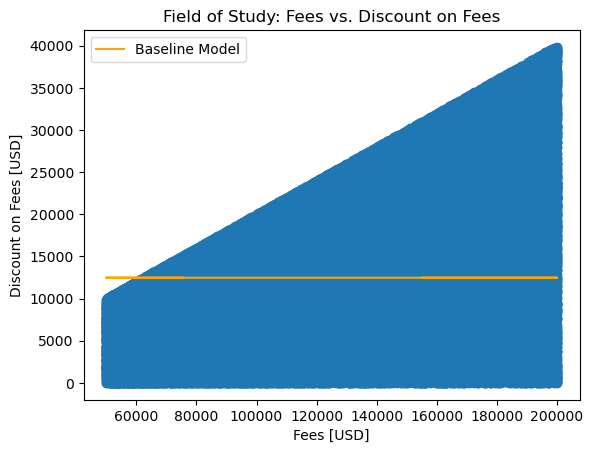

In [7]:
plt.plot(X_train.values, y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Fees [USD]")
plt.ylabel("Discount on Fees [USD]")
plt.title("Field of Study: Fees vs. Discount on Fees")
plt.legend();

In [8]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 12484.26
Baseline MAE: 7215.98


In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred_training = model.predict(X_train)
y_pred_training[:6]

array([15477.92318917, 15748.61546658,  5569.47040078, 13466.45448913,
       12568.03100331, 13135.60837231])

In [12]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 6271.19


In [13]:
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)

Model Intercept: 25.96


In [14]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "Fees and Discount of Fees":', coefficient)

Model coefficient for "Fees and Discount of Fees": 0.1


In [15]:
print(f"apt_price = {intercept} + {coefficient} * surface_covered")

apt_price = 25.96 + 0.1 * surface_covered


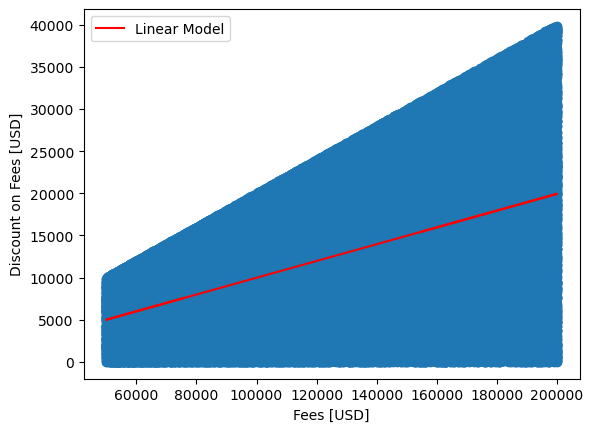

In [16]:
plt.plot(X_train.values, model.predict(X_train), color="red", label = "Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("Fees [USD]")
plt.ylabel("Discount on Fees [USD]")
plt.legend();